# Multi-Class Prediction of Obesity Risk
***

Kaggle Playground Competition

In [1]:
# Importing the pandas dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Creating pandas dataframes out of the datasets
train = pd.read_csv('./Dataset/train.csv')
test = pd.read_csv('./Dataset/test.csv')

In [3]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [5]:
ids = test['id']

for df in [train, test]:
    df.drop(['id'], axis=1, inplace=True)

In [6]:
encoder = LabelEncoder()
for df in [test, train]:
    for cat in df.select_dtypes(include=object).columns:
        df[cat] = encoder.fit_transform(df[cat])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  int64  
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  int64  
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  int64  
 5   FAVC                            13840 non-null  int64  
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  int64  
 9   SMOKE                           13840 non-null  int64  
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  int64  
 12  FAF                             

In [8]:
train.describe()
print(len(train.columns))

17


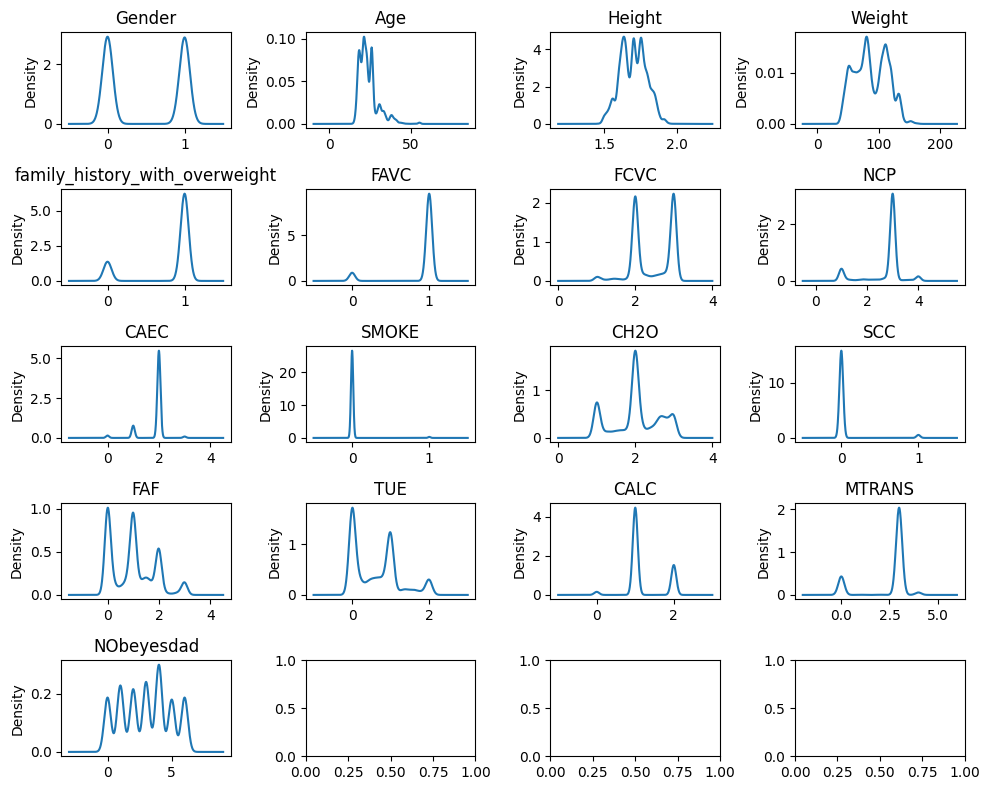

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 8))
axes = axes.flatten()
for i, columns in enumerate(train.columns):
    train[columns].plot(kind='kde', ax=axes[i], figsize=(10, 8))
    axes[i].set_title(columns)

plt.tight_layout()
plt.show()

In [10]:
Y_train = train['NObeyesdad']
X_train = train.drop(['NObeyesdad'],axis=1)
X_test = test
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0


In [11]:
Y_train

0        6
1        1
2        0
3        4
4        6
        ..
20753    3
20754    0
20755    3
20756    6
20757    3
Name: NObeyesdad, Length: 20758, dtype: int64

In [12]:
model = RandomForestClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=20,
    class_weight='balanced',
    n_estimators=700
)

In [13]:
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, n_estimators=700, random_state=42)

In [14]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_pred)

print(f'The accuracy of the training data is {train_accuracy}')

The accuracy of the training data is 0.9994700838231043


In [15]:
test_pred = model.predict(X_test)
values = encoder.inverse_transform(test_pred)
print(values)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [16]:
submission_data = pd.DataFrame({'id': ids, 'NObeyesdad': values})
print(submission_data)
submission_data.to_csv('submission.csv', index=False)

          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594        Normal_Weight
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]
